## Connecting with accounting databases

### Power BI

The easiest way to exploit the Python ecosystem in Power BI is to enable Python scripting inside Power BI. For that, you need to have Python installed in your system.

In Power BI, check from **Options - Global - Python scripting** that you have correct folders for your Python and IDE. Power BI should detect the folders automatically, but it is good to check.

Furthermore, you need to have at least Pandas, Matplotlib and Numpy installed.

You can run Python scripts inside Power BI using **Get Data - Other - Python script**. However, it is a good habit to check in your Python environment that the script is working.

There are a few limitations with the connection between Power BI/Python:
- If you want to import data, it should be represented in a Pandas data frame.
- The maximum run time of a script is 30 minutes.
- You must use full directory paths in your code, not relative paths.
- Nested tables are not supported.

Otherwise, implementing Python in Power BI is very similar to doing analysis purely inside Python. The good thing is, of course, that you have the tools of both Python and Power BI at your disposal.

### MySQL, SAP and others

There are good libraries for connecting to MySQL, for example, MySQLdb: [pypi.org/project/MySQL-python/](https://pypi.org/project/MySQL-python/). If you want, you can use your MySQL database to go through the examples, instead of SQlite.

SAP HANA is used to connect with Python to a SAP database. Here are the instructions on how to connect Python to SAP: [developers.sap.com/tutorials/hana-clients-python.html](https://developers.sap.com/tutorials/hana-clients-python.html). 
The task is quite difficult, and we are not doing that in this course.

### Sqlite

In the following, we will analyse our example database purely in Python. For that, we use an example company database that is available here: [github.com/jpwhite3/northwind-SQLite3](https://github.com/jpwhite3/northwind-SQLite3)

![Northwind](./images/Northwind.png)

This demo-database has originally been published to Microsoft Access 2000. We analyse it using Sqlite3. However, keep in mind that you can repeat the following analysis by connecting to many other databases, like SAP. In the following, we use some basic SQL statements. However, this course is not about SQL, so we do not go deeper in that direction.

Sqlite3 is included in the standard library. So, you do not need to install any additional libraries. Let's start by importing the library.

In [1]:
import sqlite3

We can create a connection to the example database with **connect()**. You need to have the **Northwind_large.sqlite** file in your work folder for the following command to work.

In [2]:
connection = sqlite3.connect('Northwind_large.sqlite')

**cursor()** returns a cursor for the connection. A cursor -object has many useful methods to execute SQL statements.

In [3]:
cursor = connection.cursor()

The tables of the database can be collected with the following commands. **execute()** is used for a SQL statement and **fetchall()** collects all the rows from the result.

In [4]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
print(cursor.fetchall())

[('Employees',), ('Categories',), ('Customers',), ('Shippers',), ('Suppliers',), ('Orders',), ('Products',), ('OrderDetails',), ('CustomerCustomerDemo',), ('CustomerDemographics',), ('Region',), ('Territories',), ('EmployeeTerritories',)]


We check the fields of the **Employees**, **OrderDetails**, **Orders** and **Products** tables. The outpus are messy lists of tuples. The name of a field is always the second item in a tuple.

In [5]:
cursor.execute("PRAGMA table_info(Employees)")
print(cursor.fetchall())

[(0, 'Id', 'INTEGER', 0, None, 1), (1, 'LastName', 'VARCHAR(8000)', 0, None, 0), (2, 'FirstName', 'VARCHAR(8000)', 0, None, 0), (3, 'Title', 'VARCHAR(8000)', 0, None, 0), (4, 'TitleOfCourtesy', 'VARCHAR(8000)', 0, None, 0), (5, 'BirthDate', 'VARCHAR(8000)', 0, None, 0), (6, 'HireDate', 'VARCHAR(8000)', 0, None, 0), (7, 'Address', 'VARCHAR(8000)', 0, None, 0), (8, 'City', 'VARCHAR(8000)', 0, None, 0), (9, 'Region', 'VARCHAR(8000)', 0, None, 0), (10, 'PostalCode', 'VARCHAR(8000)', 0, None, 0), (11, 'Country', 'VARCHAR(8000)', 0, None, 0), (12, 'HomePhone', 'VARCHAR(8000)', 0, None, 0), (13, 'Extension', 'VARCHAR(8000)', 0, None, 0), (14, 'Photo', 'BLOB', 0, None, 0), (15, 'Notes', 'VARCHAR(8000)', 0, None, 0), (16, 'ReportsTo', 'INTEGER', 0, None, 0), (17, 'PhotoPath', 'VARCHAR(8000)', 0, None, 0)]


In [6]:
cursor.execute("PRAGMA table_info(OrderDetails)")
print(cursor.fetchall())

[(0, 'Id', 'VARCHAR(8000)', 0, None, 1), (1, 'OrderId', 'INTEGER', 1, None, 0), (2, 'ProductId', 'INTEGER', 1, None, 0), (3, 'UnitPrice', 'DECIMAL', 1, None, 0), (4, 'Quantity', 'INTEGER', 1, None, 0), (5, 'Discount', 'DOUBLE', 1, None, 0)]


In [7]:
cursor.execute("PRAGMA table_info(Orders)")
print(cursor.fetchall())

[(0, 'Id', 'INTEGER', 0, None, 1), (1, 'CustomerId', 'VARCHAR(8000)', 0, None, 0), (2, 'EmployeeId', 'INTEGER', 1, None, 0), (3, 'OrderDate', 'VARCHAR(8000)', 0, None, 0), (4, 'RequiredDate', 'VARCHAR(8000)', 0, None, 0), (5, 'ShippedDate', 'VARCHAR(8000)', 0, None, 0), (6, 'ShipVia', 'INTEGER', 0, None, 0), (7, 'Freight', 'DECIMAL', 1, None, 0), (8, 'ShipName', 'VARCHAR(8000)', 0, None, 0), (9, 'ShipAddress', 'VARCHAR(8000)', 0, None, 0), (10, 'ShipCity', 'VARCHAR(8000)', 0, None, 0), (11, 'ShipRegion', 'VARCHAR(8000)', 0, None, 0), (12, 'ShipPostalCode', 'VARCHAR(8000)', 0, None, 0), (13, 'ShipCountry', 'VARCHAR(8000)', 0, None, 0)]


In [8]:
cursor.execute("PRAGMA table_info(Products)")
print(cursor.fetchall())

[(0, 'Id', 'INTEGER', 0, None, 1), (1, 'ProductName', 'VARCHAR(8000)', 0, None, 0), (2, 'SupplierId', 'INTEGER', 1, None, 0), (3, 'CategoryId', 'INTEGER', 1, None, 0), (4, 'QuantityPerUnit', 'VARCHAR(8000)', 0, None, 0), (5, 'UnitPrice', 'DECIMAL', 1, None, 0), (6, 'UnitsInStock', 'INTEGER', 1, None, 0), (7, 'UnitsOnOrder', 'INTEGER', 1, None, 0), (8, 'ReorderLevel', 'INTEGER', 1, None, 0), (9, 'Discontinued', 'INTEGER', 1, None, 0)]


Pandas has a very convenient function, **read_sql_query**, to load SQL queries to dataframes. Let's start by loading Pandas.

In [9]:
import pandas as pd

SQL queries are a whole new world, and we use only the essential. The following code picks up **LastName** from the **Employees** table, **UnitPrice** and **Quantity** from the **OrderDetails**, **OrderDate** and **ShipCountry** from **Orders**, **CategoryName** from **Categories**, and **ProductName** from **Products**. The next part of the code is important. The **JOIN** commands connect the data in different tables in a correct way. Notice how we qive our sqlite3 database connection -object as a paramter to the function.

In [10]:
query_df = pd.read_sql_query("""SELECT Employees.LastName, OrderDetails.UnitPrice, 
OrderDetails.Quantity, Orders.OrderDate, Orders.ShipCountry, Categories.CategoryName, Products.ProductName
FROM OrderDetails
JOIN Orders ON Orders.Id=OrderDetails.OrderID
JOIN Employees ON Employees.Id=Orders.EmployeeId
JOIN Products ON Products.ID=OrderDetails.ProductId
JOIN Categories ON Categories.ID=Products.CategoryID""", connection)

In [11]:
query_df

,LastName,UnitPrice,Quantity,OrderDate,ShipCountry,CategoryName,ProductName
0,Buchanan,14.00,12,2012-07-04,France,Dairy Products,Queso Cabrales
1,Buchanan,9.80,10,2012-07-04,France,Grains/Cereals,Singaporean Hokkien Fried Mee
2,Buchanan,34.80,5,2012-07-04,France,Dairy Products,Mozzarella di Giovanni
3,Suyama,18.60,9,2012-07-05,Germany,Produce,Tofu
4,Suyama,42.40,40,2012-07-05,Germany,Produce,Manjimup Dried Apples
...,...,...,...,...,...,...,...
621878,Davolio,21.00,20,2013-08-31 02:59:28,Venezuela,Grains/Cereals,Gustaf's Knäckebröd
621879,Davolio,13.00,11,2013-08-31 02:59:28,Venezuela,Condiments,Original Frankfurter grüne Soße
621880,Davolio,39.00,45,2013-08-31 02:59:28,Venezuela,Meat/Poultry,Alice Mutton
621881,Davolio,25.00,7,2013-08-31 02:59:28,Venezuela,Condiments,Grandma's Boysenberry Spread


Now that we have everything neatly in a Pandas dataframe, we can do many kinds of analyses. The other chapters focus more on the Pandas functionality, but let's try something that we can do.

For example, to analyse trends, we can change **OrderDate** to a datetime object with **to_datetime()**.

In [12]:
query_df['OrderDate'] = pd.to_datetime(query_df['OrderDate'])

In [13]:
query_df

,LastName,UnitPrice,Quantity,OrderDate,ShipCountry,CategoryName,ProductName
0,Buchanan,14.00,12,2012-07-04 00:00:00,France,Dairy Products,Queso Cabrales
1,Buchanan,9.80,10,2012-07-04 00:00:00,France,Grains/Cereals,Singaporean Hokkien Fried Mee
2,Buchanan,34.80,5,2012-07-04 00:00:00,France,Dairy Products,Mozzarella di Giovanni
3,Suyama,18.60,9,2012-07-05 00:00:00,Germany,Produce,Tofu
4,Suyama,42.40,40,2012-07-05 00:00:00,Germany,Produce,Manjimup Dried Apples
...,...,...,...,...,...,...,...
621878,Davolio,21.00,20,2013-08-31 02:59:28,Venezuela,Grains/Cereals,Gustaf's Knäckebröd
621879,Davolio,13.00,11,2013-08-31 02:59:28,Venezuela,Condiments,Original Frankfurter grüne Soße
621880,Davolio,39.00,45,2013-08-31 02:59:28,Venezuela,Meat/Poultry,Alice Mutton
621881,Davolio,25.00,7,2013-08-31 02:59:28,Venezuela,Condiments,Grandma's Boysenberry Spread


Next, we can change our datetime object as index. 

In [14]:
query_df.index = query_df['OrderDate']

In [15]:
query_df

,LastName,UnitPrice,Quantity,OrderDate,ShipCountry,CategoryName,ProductName
OrderDate,,,,,,,
2012-07-04 00:00:00,Buchanan,14.00,12,2012-07-04 00:00:00,France,Dairy Products,Queso Cabrales
2012-07-04 00:00:00,Buchanan,9.80,10,2012-07-04 00:00:00,France,Grains/Cereals,Singaporean Hokkien Fried Mee
2012-07-04 00:00:00,Buchanan,34.80,5,2012-07-04 00:00:00,France,Dairy Products,Mozzarella di Giovanni
2012-07-05 00:00:00,Suyama,18.60,9,2012-07-05 00:00:00,Germany,Produce,Tofu
2012-07-05 00:00:00,Suyama,42.40,40,2012-07-05 00:00:00,Germany,Produce,Manjimup Dried Apples
...,...,...,...,...,...,...,...
2013-08-31 02:59:28,Davolio,21.00,20,2013-08-31 02:59:28,Venezuela,Grains/Cereals,Gustaf's Knäckebröd
2013-08-31 02:59:28,Davolio,13.00,11,2013-08-31 02:59:28,Venezuela,Condiments,Original Frankfurter grüne Soße
2013-08-31 02:59:28,Davolio,39.00,45,2013-08-31 02:59:28,Venezuela,Meat/Poultry,Alice Mutton


We still need to order the index.

In [16]:
query_df.sort_index(inplace=True)

Let's calculate the total number of orders for different product categories.

<AxesSubplot:>

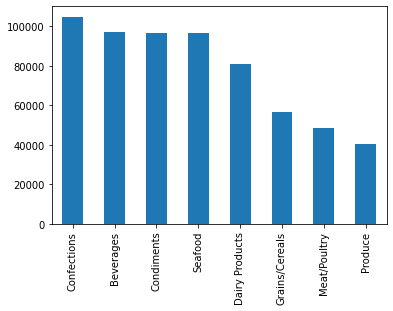

In [17]:
query_df['CategoryName'].value_counts().plot.bar()

Let's check next, to which country the company is selling the most. The following command is quite long! First, it groups values by **ShipCountry**, then counts values and sorts them in a descending order by **Quantity**, and finally selects only **Quantity** -column.

In [18]:
query_df.groupby('ShipCountry').count().sort_values('Quantity',ascending=False)['Quantity']

ShipCountry
USA            89059
Germany        85923
France         67314
Brazil         60663
UK             50162
Mexico         34979
Venezuela      29128
Spain          26270
Argentina      21233
Italy          19952
Canada         19652
Finland        14661
Belgium        14505
Sweden         14147
Switzerland    14049
Denmark        13764
Austria        13669
Portugal       12684
Poland          6756
Ireland         6688
Norway          6625
Name: Quantity, dtype: int64

A nice thing in Python (and Pandas) is that we change the previous to a bar chart just by adding **plot.bar()** to the end of the command.

Let's first load Matplotlib to make our plots prettier.

In [19]:
import matplotlib.pyplot as plt

In [20]:
plt.style.use('fivethirtyeight')

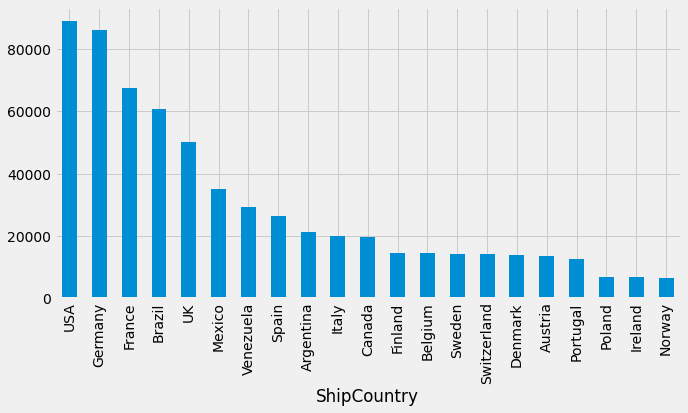

In [21]:
query_df.groupby('ShipCountry').count().sort_values('Quantity',ascending=False)['Quantity'].plot.bar(figsize=(10,5))
plt.show()

With pivot tables, we can do a 2-way grouping.

In [22]:
query_df.pivot_table(index='LastName',columns='ShipCountry',values='Quantity',aggfunc=sum)

ShipCountry,Argentina,Austria,Belgium,Brazil,Canada,Denmark,Finland,France,Germany,Ireland,...,Mexico,Norway,Poland,Portugal,Spain,Sweden,Switzerland,UK,USA,Venezuela
LastName,,,,,,,,,,,,,,,,,,,,,
Buchanan,68252,40687,45468,182595,55898,47414,40935,169200,265031,21996,...,103888,18487,19077,34787,76052,46805,39866,123721,263998,95810
Callahan,50977,46506,21741,201153,58506,42306,27732,192488,237532,16133,...,86354,12045,19728,31522,73022,40745,34171,155124,250614,62389
Davolio,66186,44332,47841,150727,50957,42275,47406,186479,229137,16471,...,105282,9071,22855,31563,61587,33431,38221,149707,258013,73040
Dodsworth,48936,42499,45385,173881,58663,29649,38434,218987,239419,23881,...,91115,16886,19259,43262,69528,36657,50513,146315,207208,105907
Fuller,61848,25092,46255,155750,55919,29790,30799,184553,228026,20975,...,119410,22544,21392,30644,69067,31062,31412,130891,250988,86679
King,45559,39419,41950,166678,45888,31635,56539,194100,258696,15336,...,94927,35009,16933,28930,62777,46751,43769,162153,240532,74124
Leverling,64409,38191,35325,188315,74915,36741,42688,204843,243401,22365,...,82019,21029,13554,39832,82488,46028,44096,146039,305553,66031
Peacock,62869,28476,52329,171980,56217,46333,50386,172114,244482,12059,...,89564,18977,12986,44000,92110,40524,44052,132325,252295,90487
Suyama,69697,44687,35595,148480,45064,43631,39998,193725,246849,22518,...,123194,14638,24995,37539,82311,38743,31109,134042,246389,87347


With **Quantity** and **OrderPrice**, we can calculate the total price of the orders. Using * for multiplication, Python/Pandas makes the multiplication element-wise.

In [23]:
query_df['TotalPrice'] = query_df['Quantity']*query_df['UnitPrice']

There is too much information to one plot, so let's resample the data before plotting (**'M'** means monthly).

<AxesSubplot:xlabel='OrderDate'>

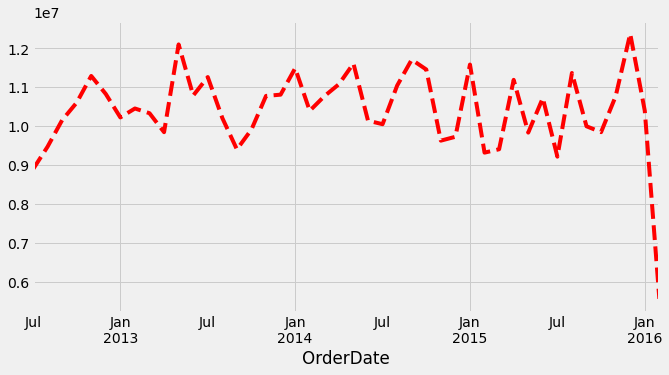

In [24]:
query_df['TotalPrice'].resample('M').sum().plot(figsize=(10,5),style='r--')

Let's plot how the sales of different salesperson have progressed. The **for** loop in the command goes through all the salesperson and draws their performance to the same chart. With **set**, we can pick from the **LastName** column unique values.

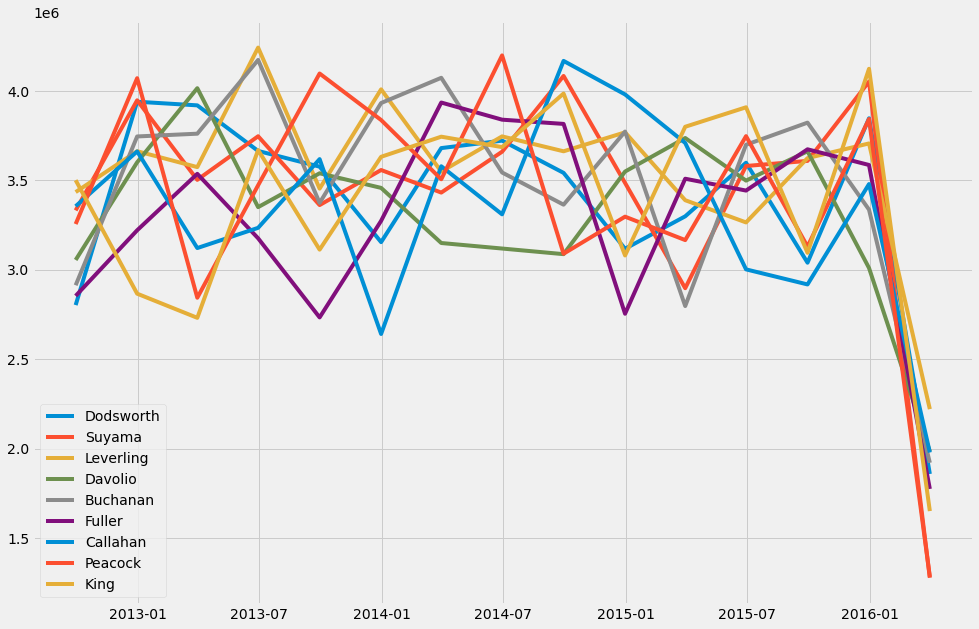

In [25]:
plt.figure(figsize=(15,10))
for name in set(query_df['LastName']):
    plt.plot(query_df['TotalPrice'][query_df['LastName'] == name].resample('Q').sum())
plt.legend(set(query_df['LastName']))
plt.show()

We can also use bar charts. Here are the sales of different salesperson and product categories. We first do a two-level grouping, sum the values in those groups, and pick **TotalPrice**. Adding **plot.barh()** to the end turns the 2-level grouping table into a bar chart. 

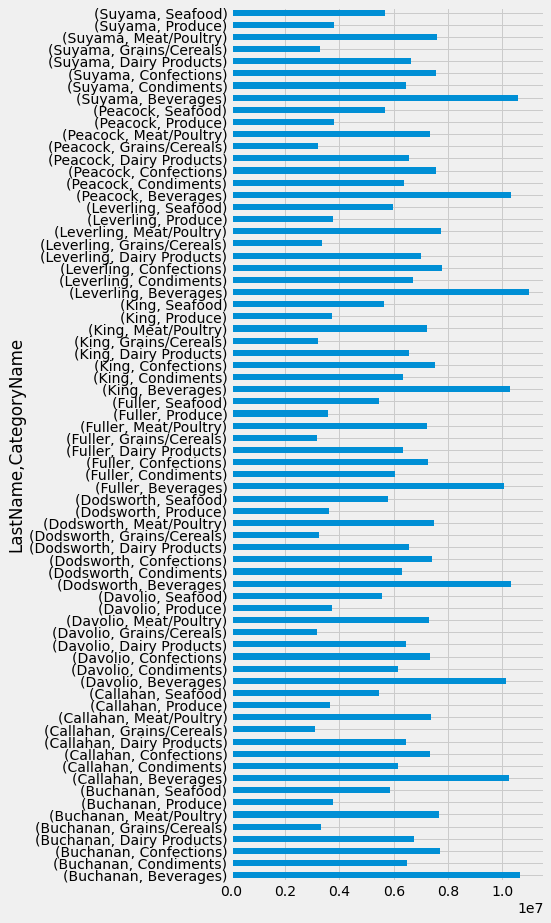

In [26]:
query_df.groupby(['LastName','CategoryName']).sum()['TotalPrice'].plot.barh(figsize=(5,15))
plt.show()

We can also use percentage values in tables. (I admit, the following command is a mess!). It divides the values of a **LastName/CategoryName** -pivot table with the row sums of that table. Then, it multiplies these numbers by hundred. **style.format** is used to decrease the number of decimals to 2 **2f**, and to add **%** to the end.

In [27]:
(query_df.pivot_table(values = 'TotalPrice', index = 'LastName',
                      columns = 'CategoryName').divide(query_df.pivot_table(values = 'TotalPrice',
                    index = 'LastName', columns = 'CategoryName').sum(axis=1),axis=0)*100).style.format('{:.2f} %')

CategoryName,Beverages,Condiments,Confections,Dairy Products,Grains/Cereals,Meat/Poultry,Produce,Seafood
LastName,,,,,,,,
Buchanan,15.70 %,9.51 %,10.41 %,11.92 %,8.35 %,22.39 %,13.14 %,8.58 %
Callahan,15.71 %,9.52 %,10.41 %,11.84 %,8.18 %,22.45 %,13.44 %,8.45 %
Davolio,15.45 %,9.46 %,10.37 %,11.89 %,8.34 %,22.36 %,13.70 %,8.43 %
Dodsworth,15.65 %,9.64 %,10.32 %,11.91 %,8.38 %,22.36 %,13.06 %,8.67 %
Fuller,15.73 %,9.45 %,10.39 %,11.87 %,8.39 %,22.35 %,13.28 %,8.53 %
King,15.59 %,9.59 %,10.56 %,11.94 %,8.36 %,21.95 %,13.49 %,8.53 %
Leverling,15.69 %,9.58 %,10.42 %,11.98 %,8.37 %,22.31 %,13.08 %,8.58 %
Peacock,15.41 %,9.50 %,10.44 %,11.83 %,8.33 %,22.27 %,13.61 %,8.60 %
Suyama,15.63 %,9.52 %,10.36 %,11.86 %,8.34 %,22.40 %,13.38 %,8.52 %


### Other sources of accounting data

Google Dataset Search is an excellent source of datasets, including interesting accounting datasets: [datasetsearch.research.google.com/](https://datasetsearch.research.google.com/)

Quandl is another interesting source of data. They have some free datasets, but you need to register to get an api key before you can download any data. Quandl offers a library that you can use to download datasets directly in Python: [www.quandl.com/](https://www.quandl.com/)

#### Pandas Datareader
Pandas Datareader is a library that can be used to download external datasets to Pandas dataframes. [pandas-datareader.readthedocs.io/en/latest/](https://pandas-datareader.readthedocs.io/en/latest/)

Currently, the following sources are supported in Pandas Datareader
* Tiingo
* IEX
* Alpha Vantage
* Enigma
* EconDB
* Quandl
* St.Louis FED (FRED)
* Kenneth French’s data library
* World Bank
* OECD
* Eurostat
* Thrift Savings Plan
* Nasdaq Trader symbol definitions
* Stooq
* MOEX
* Naver Finance

For most of these, free registration is required to get an API key.

You need to install Datareader first. It is included in Anaconda and can also be installed with Pip using a command **pip install pandas-datareader**.

Let's import the library

In [28]:
import pandas_datareader as pdr

Let's use in our example EconDB ([www.econdb.com/](https://www.econdb.com/)). In the following code, we load the quarterly values of Finland's gross domectic product from the year 1999 to the most recent value.

In [29]:
data = pdr.data.DataReader('ticker=RGDPFI','econdb',start=1999)

It returns a Pandas dataframe, to which we can apply all the Pandas functions.

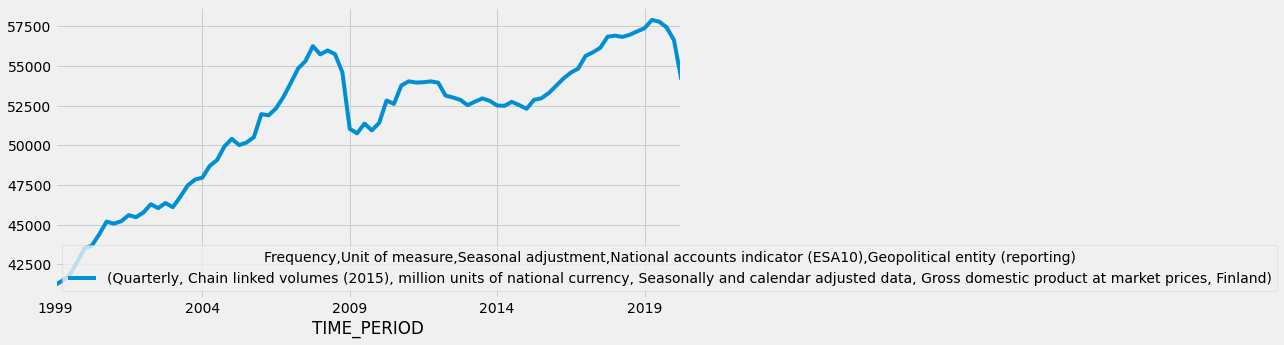

In [30]:
data.plot(figsize=(10,5))
plt.show()

Fama/French data library is also very interesting for accounting research. [mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html)

In [31]:
import pandas_datareader.famafrench as fama

There are 297 datasets available.

In [32]:
len(fama.get_available_datasets())

297

Let's load an industry portfolio return data.

In [33]:
data2 = pdr.data.DataReader('10_Industry_Portfolios', 'famafrench')

This time, it returns a dictionary. The items of the dictionary are dataframes with different data. **DESCR** can be used to get information about the data.

In [34]:
type(data2)

dict

In [35]:
data2['DESCR']

'10 Industry Portfolios\n----------------------\n\nThis file was created by CMPT_IND_RETS using the 202009 CRSP database. It contains value- and equal-weighted returns for 10 industry portfolios. The portfolios are constructed at the end of June. The annual returns are from January to December. Missing data are indicated by -99.99 or -999. Copyright 2020 Kenneth R. French\n\n  0 : Average Value Weighted Returns -- Monthly (59 rows x 10 cols)\n  1 : Average Equal Weighted Returns -- Monthly (59 rows x 10 cols)\n  2 : Average Value Weighted Returns -- Annual (5 rows x 10 cols)\n  3 : Average Equal Weighted Returns -- Annual (5 rows x 10 cols)\n  4 : Number of Firms in Portfolios (59 rows x 10 cols)\n  5 : Average Firm Size (59 rows x 10 cols)\n  6 : Sum of BE / Sum of ME (6 rows x 10 cols)\n  7 : Value-Weighted Average of BE/ME (6 rows x 10 cols)'

<AxesSubplot:xlabel='Date'>

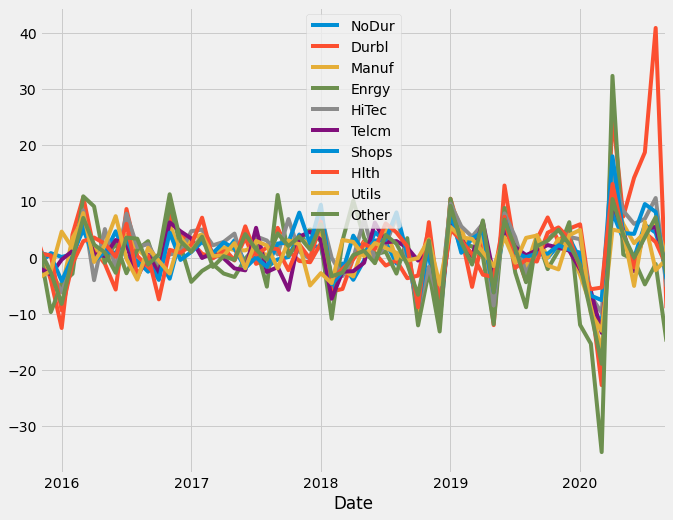

In [36]:
data2[0].plot(figsize=(10,8))